[View in Colaboratory](https://colab.research.google.com/github/spajeo/atelier-machine-learning/blob/master/ReinforcementLearning/UCB/exerciceUCB_Sujet.ipynb)

# Upper Confidence Bound Algorithm

Importer les librairies numpy, matplotlib.pyplot, pandas, math

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
!wget 'https://www.dropbox.com/s/gpz2ekchbzb9wlb/Ads_CTR_Optimisation.csv?dl=0' -O data.csv

--2018-05-16 22:48:00--  https://www.dropbox.com/s/gpz2ekchbzb9wlb/Ads_CTR_Optimisation.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/h0AoBCeS0RHCaa9kV8FENE4lgq6QnkR0gfZQEkggBgpQsyhegNjPo5BiKSoOskpJ/file [following]
--2018-05-16 22:48:02--  https://dl.dropboxusercontent.com/content_link/h0AoBCeS0RHCaa9kV8FENE4lgq6QnkR0gfZQEkggBgpQsyhegNjPo5BiKSoOskpJ/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.66.6, 2620:100:601f:6::a27d:906
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.66.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210050 (205K) [text/csv]
Saving to: ‘data.csv’

data.csv            100%[===================>] 205.13K   567KB/s    in 0.4s    

2018-05-16 22:48

Importer le fichier 'Ads_CTR_Optimisation.csv'
Afficher les 10 premieres lignes pour voir les donnees

In [3]:
df = pd.read_csv('data.csv')
df.head(15)

# Simulateur de comportement utilisateur.


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


 Initialisez les variables necessaires : 
 N (nombre d'iterations egale le nombre de lignes dans le dataset), 
 number_ads (nombre de publicites a afficher = nombre de colonnes)

In [4]:
!ls


data.csv  datalab


In [5]:
N = df.shape[0]
number_ads = df.shape[1]
N, number_ads

(10000, 10)

Initialisez les 4 tableaux d'entiers pour stocker les resultats d'affichage (nombre d'affichage pour chaque publicite, nombre de clicks pour chaque publicite, le taux de clicks pour chaque publicite, le ucb pour chaque publicite)
Toutes les valeurs initialisez a zero, sauf delta qui devrait etre initialisee a 1e400 .

In [0]:
# col = df.columns.values
# number_of_display = np.full((number_ads), 1e400)
# number_of_clicks = np.full((number_ads), 1e400)
# taux_de_click = np.full((number_ads), 1e400)
# ucb = np.full((number_ads), 1e400)

number_of_display = [0] * number_ads
number_of_clicks = [0] * number_ads
taux_de_click = [0] * number_ads
ucb = [1e400] * number_ads

# number_of_display,number_of_clicks,taux_de_click, ucb

On initialise une liste pour sauvegarder l'historique des actions 

In [0]:
display_history = []

Definissez une fonction qui calcule le taux de click pour chaque publicite. 
Il faut diviser le nombre de fois ou publicite a ete clickee par le nombre de fois qu'elle a ete affichee. Attention a la division par zero !!!

In [0]:
# def calcul_taux_de_click (n):
#   return np.divide(number_of_clicks, number_of_display)
def calcul_taux_de_click(ad_index):
    if number_of_display[ad_index] > 0:
        return (number_of_clicks[ad_index] / number_of_display[ad_index])

Definissez une fonction qui verifie si la publicite affichee a ete clike ou pas. Elle va  chercher dans le dataset la valeur 0 ou 1 suivant le numero d'internaute et le numero de la publicite affichee. Vous pouvez utiliser une methode values(raw. column) de l'objet dataset.

In [0]:
def get_result_from_file(row, column):
    return (df.values[row, column])

Definissez une fonction qui calcule l'intervalle de confiance (DELTA). La formule magique est dans le cours, mais c'est aussi une racine carree du :
    logarithme de N divise par le nombre de fois que la publicite a ete affichee. 
    coeficient 3/2
Attention a la division par zero et au log de zero !!!
Vous pouvez ajouter + 1 par exemple


In [0]:
def calcul_delta (n, ad_index):
    delta = math.sqrt(3/2 * math.log(n + 1) / number_of_display[ad_index])
    return delta

La derniere fonction : calculer le UCB pour une publicite donnee. Ceci est vraiment simple. C'est la valeur maximale de taux de clicks qu'on peut avoir, tenant compte de l'interval de confiance. (somme de taux de clics plus delta)

In [0]:
def calcul_UCB (n, ad_index):
    if number_of_display[ad_index] > 0 :
        return (taux_de_click[ad_index] + calcul_delta (n, ad_index))
    else:
        return 1e400

Ecrivez le corps de l'algorithme, tel que vu en atelier.
A la fin de chaque iteration ajoutez le code suivant
    if iteration % 1000 == 0 :
        display_history.append(number_of_display.copy())
Ceci va permettre d'enregistrer l'historique de modification de comportement de l'algorithme tous les 1000 iterations.

In [24]:
col = df.columns.values

# pour chaque iteration je cherche la meilleure publicite a afficher


for n in range(0, N):
    best_ucb = 0
    best_ad = 0
    # pour chaque publicite (action possible) je compare le ucb, et je garde index du meilleur ucb
    for ad_index in range(0, number_ads):
        
        # mettre a jour le tableau avec les taux de clicks
        taux_de_click[ad_index] = calcul_taux_de_click(ad_index)
        
        # mettre a jour le UCB pour chaque publicite
        ucb[ad_index] = calcul_UCB(n, ad_index)
        
        # trouver le meilleur ucb et la publicite a afficher
        if best_ucb < ucb[ad_index]:
            best_ucb = ucb[ad_index]
            best_ad = ad_index

    
    # verifier le resultat d'affichage de la publicite dans le fichier de simulation
    result = get_result_from_file(n, best_ad)
    
    # mettre a jour le tableau d'affichages
    number_of_display[best_ad] = number_of_display[best_ad] + 1 

    # mettre a jour le tableau de clicks
    number_of_clicks[best_ad] = number_of_clicks[best_ad] + result
    
    # ici memoriser historique des choix de l'algorithme apres chaque 1000 iterations
    if (n + 1) % 1000 == 0 :
        print("appending ", number_of_display)
        display_history.append(number_of_display.copy())

appending  [109, 79, 53, 68, 287, 53, 86, 140, 64, 61]
appending  [200, 126, 86, 126, 685, 81, 142, 337, 117, 100]
appending  [281, 213, 109, 188, 1226, 99, 184, 424, 157, 119]
appending  [357, 245, 123, 254, 1780, 111, 215, 586, 196, 133]
appending  [395, 273, 135, 265, 2587, 119, 229, 650, 206, 141]
appending  [436, 315, 154, 297, 3230, 130, 255, 803, 221, 159]
appending  [595, 325, 172, 306, 3731, 137, 269, 1060, 239, 166]
appending  [645, 354, 179, 317, 4545, 143, 278, 1118, 248, 173]
appending  [653, 365, 183, 327, 5452, 147, 283, 1154, 253, 183]
appending  [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]


# Visualisations

Felicitations ! Maintenant vous pouvez visualiser les resultats

In [26]:
number_of_display

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

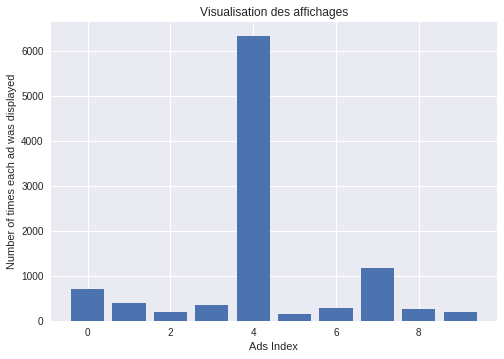

In [27]:
plt.bar(range(10), number_of_display)
plt.title('Visualisation des affichages')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed')
plt.show()

In [28]:
number_of_clicks

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [29]:
total_clicks = sum(number_of_clicks)
total_clicks

2178

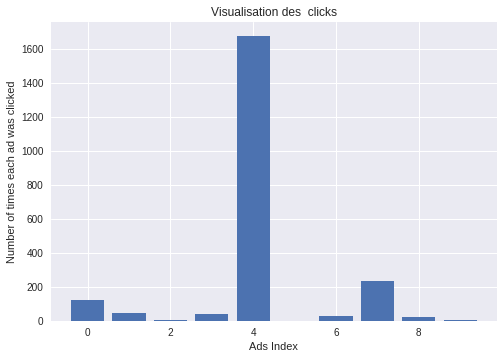

In [30]:
plt.bar(range(10), number_of_clicks)
plt.title('Visualisation des  clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was clicked')
plt.show()

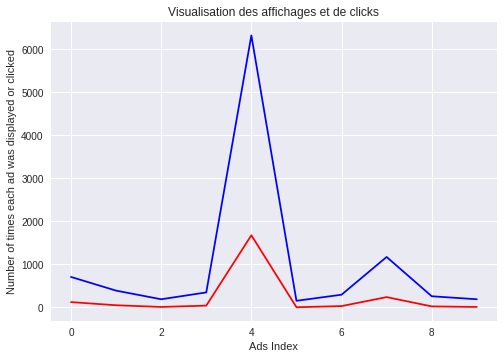

In [31]:
plt.plot(number_of_display, color="blue")
plt.plot(number_of_clicks, color="red")
plt.title('Visualisation des affichages et de clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed or clicked')
plt.show()

In [32]:
total_clicks

2178

In [33]:
display_history

[[109, 79, 53, 68, 287, 53, 86, 140, 64, 61],
 [200, 126, 86, 126, 685, 81, 142, 337, 117, 100],
 [281, 213, 109, 188, 1226, 99, 184, 424, 157, 119],
 [357, 245, 123, 254, 1780, 111, 215, 586, 196, 133],
 [395, 273, 135, 265, 2587, 119, 229, 650, 206, 141],
 [436, 315, 154, 297, 3230, 130, 255, 803, 221, 159],
 [595, 325, 172, 306, 3731, 137, 269, 1060, 239, 166],
 [645, 354, 179, 317, 4545, 143, 278, 1118, 248, 173],
 [653, 365, 183, 327, 5452, 147, 283, 1154, 253, 183],
 [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]]

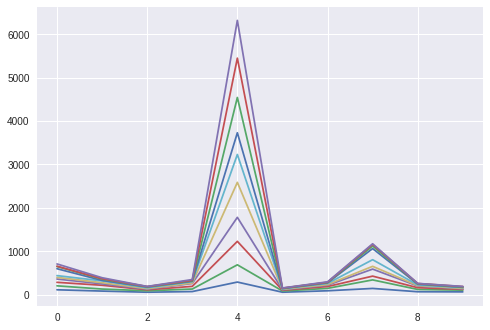

In [34]:
for i in range (0,10):
    plt.plot(display_history[i])